# Exploratory Data Analysis | supply chain dataset | exploring the delivery status

**Defining some open-ended questions:**

After exploring the columns, we defined two open-ended questions:
- **What could affect the shipment time?**
- **What is the impact of the origin of the order and the quantity of items per order on the Delivery status**

For the columns we decided to keep, we think they are related to the shipment. So we create a new data frame called "sf"

# 1. - Import libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt     # visualisation
import seaborn as sns               # better visualisation and more related to data science
import numpy as np                  # numerical python

from scipy.stats import chi2_contingency            # calculating chi-square
from scipy.stats.contingency import association
import statsmodels.api as sm

# For showing all the the Data Frame columns
%matplotlib inline
pd.set_option('display.max_columns', None)

# 2. - Read dataset (csv-file)

- link -> [DataCo Supply Chain Dataset | kaggle.com | by Evil Spirit05](https://www.kaggle.com/datasets/evilspirit05/datasupplychain/data)

In [3]:
# read the dataset
data = pd.read_csv(r"..\dataset\DataCoSupplyChainDataset.csv", encoding='latin1')       # read csv file with choosing the correct encoding type
df = pd.DataFrame(data.copy())                                                          # copying the file to have a raw file that stays like it is and a copy to work with

print(df.shape)                                                                         # showing the shape of the dataset -> count of rows/columns


(180519, 53)


## 2.1 - study the dataset

### 2.1.1 - first 5 rows

In [21]:
df.sort_values("Order Id").head()                                                     # showing first rows to validate that there is the correct data inside the file

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
33833,CASH,2,4,88.790001,239.979996,Advance shipping,0,43,Camping & Hiking,Hickory,EE. UU.,XXXXXXXXX,Mary,11599,Malone,XXXXXXXXX,Consumer,NC,8708 Indian Horse Highway,28601.0,7,Fan Shop,35.776661,-81.362625,LATAM,Mexico City,México,11599,1/1/2015 0:00,1,957,60.00,0.20,1,299.980011,0.37,1,299.980011,239.979996,88.790001,Central America,Distrito Federal,CLOSED,NaN,957,43,NaN,http://images.acmesports.sports/Diamondback+Wo...,Diamondback Women's Serene Classic Comfort Bi,299.980011,0,1/3/2015 0:00,Standard Class
77011,PAYMENT,3,4,91.180000,193.990005,Advance shipping,0,48,Water Sports,Chicago,EE. UU.,XXXXXXXXX,David,256,Rodriguez,XXXXXXXXX,Consumer,IL,7605 Tawny Horse Falls,60625.0,7,Fan Shop,41.832722,-87.980484,LATAM,Dos Quebradas,Colombia,256,1/1/2015 0:21,2,1073,6.00,0.03,2,199.990005,0.47,1,199.990005,193.990005,91.180000,South America,Risaralda,PENDING_PAYMENT,NaN,1073,48,NaN,http://images.acmesports.sports/Pelican+Sunstr...,Pelican Sunstream 100 Kayak,199.990005,0,1/4/2015 0:21,Standard Class
109322,PAYMENT,3,4,68.250000,227.500000,Advance shipping,0,24,Women's Apparel,Chicago,EE. UU.,XXXXXXXXX,David,256,Rodriguez,XXXXXXXXX,Consumer,IL,7605 Tawny Horse Falls,60625.0,5,Golf,41.832722,-87.980484,LATAM,Dos Quebradas,Colombia,256,1/1/2015 0:21,2,502,22.50,0.09,3,50.000000,0.30,5,250.000000,227.500000,68.250000,South America,Risaralda,PENDING_PAYMENT,NaN,502,24,NaN,http://images.acmesports.sports/Nike+Men%27s+D...,Nike Men's Dri-FIT Victory Golf Polo,50.000000,0,1/4/2015 0:21,Standard Class
87884,PAYMENT,3,4,36.470001,107.889999,Advance shipping,0,18,Men's Footwear,Chicago,EE. UU.,XXXXXXXXX,David,256,Rodriguez,XXXXXXXXX,Consumer,IL,7605 Tawny Horse Falls,60625.0,4,Apparel,41.832722,-87.980484,LATAM,Dos Quebradas,Colombia,256,1/1/2015 0:21,2,403,22.10,0.17,4,129.990005,0.34,1,129.990005,107.889999,36.470001,South America,Risaralda,PENDING_PAYMENT,NaN,403,18,NaN,http://images.acmesports.sports/Nike+Men%27s+C...,Nike Men's CJ Elite 2 TD Football Cleat,129.990005,0,1/4/2015 0:21,Standard Class
114915,CASH,5,4,33.590000,159.940002,Late delivery,1,46,Indoor/Outdoor Games,San Antonio,EE. UU.,XXXXXXXXX,Brian,8827,Wilson,XXXXXXXXX,Home Office,TX,8396 High Corners,78240.0,7,Fan Shop,29.520010,-98.637413,LATAM,Dos Quebradas,Colombia,8827,1/1/2015 1:03,4,1014,39.98,0.20,8,49.980000,0.21,4,199.919998,159.940002,33.590000,South America,Risaralda,CLOSED,NaN,1014,46,NaN,http://images.acmesports.sports/O%27Brien+Men%...,O'Brien Men's Neoprene Life Vest,49.980000,0,1/6/2015 1:03,Standard Class


### 2.1.2 - count of unique values for each column

In [6]:
df.nunique()

Type                                  4
Days for shipping (real)              7
Days for shipment (scheduled)         4
Benefit per order                 21998
Sales per customer                 2927
Delivery Status                       4
Late_delivery_risk                    2
Category Id                          51
Category Name                        50
Customer City                       563
Customer Country                      2
Customer Email                        1
Customer Fname                      782
Customer Id                       20652
Customer Lname                     1109
Customer Password                     1
Customer Segment                      3
Customer State                       46
Customer Street                    7458
Customer Zipcode                    995
Department Id                        11
Department Name                      11
Latitude                          11250
Longitude                          4487
Market                                5


### 2.1.3 - checking if two columns are identical

In [22]:
# checking if two columns are the same: True -> they are equal | False -> They are NOT equal
df['Benefit per order'].equals(df['Order Profit Per Order'])

True

#### 2.1.3.1 - first approach with loop (checking if two columns have identical values in every single row)

In [ ]:
first = "Shipping Mode"
second = "Days for shipment (scheduled)"
df_sorted_order_id = df.sort_values(first)

i = 0
old_first = -99
old_second = -99

for index, row in df_sorted_order_id.iterrows():
    #print(row["Order Id"], row["Customer State"])
    i += 1
    if row[first] != old_first:
        old_first = row["Order Id"]
        old_second = row[second]
        #print(f"new {first}: {row[first]}")
    elif row[second] != old_second:
        print(f"different values in column '{second}': {row[second]} line {index} ({row[second]}) -> line {index-1} ({old_second})")
        #break

#print(i)
#print(df_sorted_order_id.shape[0])
if i == df_sorted_order_id.shape[0]:
    print(f"all rows ({i}) processed!")

all rows (180519) processed!


### 2.1.4 - find and show duplicated columns (across the entire dataset)

In [23]:
# find duplicated columns -> return only the duplicates, it will not return the first of the duplicates
duplicated_cols = df.T.duplicated()     

# show duplicated column names
df.columns[duplicated_cols]   

Index(['Customer Password', 'Order Customer Id', 'Order Item Total',
       'Order Profit Per Order', 'Product Card Id', 'Product Category Id',
       'Product Price'],
      dtype='object')

# 3. - data cleaning

## 3.1 - manually decided which columns to keep

In [43]:
# manually decided which columns to keep -> put them in a list -> copy only these columns from the data frame
req_col_delivery_time = ['Days for shipping (real)', 'Days for shipment (scheduled)', 'Sales', 'Order Item Discount', 'Delivery Status', 'Market', 'Order Country', 'Order Id', 'Order Item Quantity']
sf = df[req_col_delivery_time].copy()
sf = sf.sort_values("Order Id")
sf.head()

,Days for shipping (real),Days for shipment (scheduled),Sales,Order Item Discount,Delivery Status,Market,Order Country,Order Id,Order Item Quantity
33833,2,4,299.980011,60.00,Advance shipping,LATAM,México,1,1
77011,3,4,199.990005,6.00,Advance shipping,LATAM,Colombia,2,1
109322,3,4,250.000000,22.50,Advance shipping,LATAM,Colombia,2,5
87884,3,4,129.990005,22.10,Advance shipping,LATAM,Colombia,2,1
114915,5,4,199.919998,39.98,Late delivery,LATAM,Colombia,4,4


## 3.2 - grouping by "order_id" (summarize many rows)

- but only the necessary columns (with aggregation of all columns with the methods "first" and "sum")

In [44]:
sf = sf.groupby("Order Id").agg({      
        # these columns have the same value for each item of the same order, so keep the first
        'Days for shipping (real)':"first",
        'Days for shipment (scheduled)': "first",
        'Delivery Status': "first",           
        'Market': "first",                
        'Order Country': "first", 
       
        # the value is the unique for each item of the same order so sum all for this order        
        'Order Item Quantity': "sum",
        
        'Sales': "sum",
        'Order Item Discount': "sum",                   
        })

## 3.3 - calculate and add the columns "discount_ratio"

In [45]:
sf["discount_ratio"] = sf["Order Item Discount"]/sf["Sales"]

## 3.4 - drop the not needed columns after calculating the discount ratio

In [46]:
# drop the not needed columns after calculating the discount ratio
sf = sf.drop(columns=["Sales", "Order Item Discount"])

## 3.5 - rename columns (only lower case and change " " to "_")

In [47]:
sf.columns = sf.columns.str.lower().str.replace(" ", "_").str.replace(r"[()]", "", regex=True)

# 4 - checking if the cleaned dataset is what we expected

## 4.1 - checking the whole dataset

In [31]:
display(sf)

,days_for_shipping_real,days_for_shipment_scheduled,delivery_status,market,order_country,order_item_quantity
Order Id,,,,,,
1,2,4,Advance shipping,LATAM,México,1
2,3,4,Advance shipping,LATAM,Colombia,7
4,5,4,Late delivery,LATAM,Colombia,14
5,6,4,Late delivery,LATAM,Colombia,10
7,3,2,Late delivery,LATAM,Brasil,7
...,...,...,...,...,...,...
77200,6,4,Late delivery,Pacific Asia,Indonesia,1
77201,2,4,Advance shipping,Pacific Asia,Indonesia,1
77202,3,4,Advance shipping,Pacific Asia,Indonesia,1


## 4.2 - checking if the count of unique Order Ids is equal to the rows after grouping

In [32]:
print(f"order_id new: {sf.shape[0]} <-> order_id old: {df["Order Id"].nunique()}")

order_id new: 65752 <-> order_id old: 65752


# 5. - export cleaned dataframe as csv

In [48]:
sf.to_csv(r"..\dataset\DataCoSupplyChainDataset_cleaned.csv", encoding='latin1')

# 6. - Univariate Analysis

## 6.1 - column "delivery_status" 
**Conclusion:**
- categorical/nominal value
- only 4 possible values: 'Advance shipping', 'Late delivery', 'Shipping on time', 'Shipping canceled'
- the most common delivery status is "Late delivery" -> more than 50%


### 6.1.1 - find all unique values

In [49]:
list(sf.delivery_status.unique())

['Advance shipping', 'Late delivery', 'Shipping on time', 'Shipping canceled']

### 6.1.2 - research the distribution

In [50]:
frequency_table = pd.DataFrame(sf.delivery_status.value_counts())
frequency_table_normalized = pd.DataFrame(sf.delivery_status.value_counts(normalize=True)).round(2)
display(frequency_table.join(frequency_table_normalized))

,count,proportion
delivery_status,,
Late delivery,36048,0.55
Advance shipping,15127,0.23
Shipping on time,11722,0.18
Shipping canceled,2855,0.04


### 6.1.3 - countplot of distribution

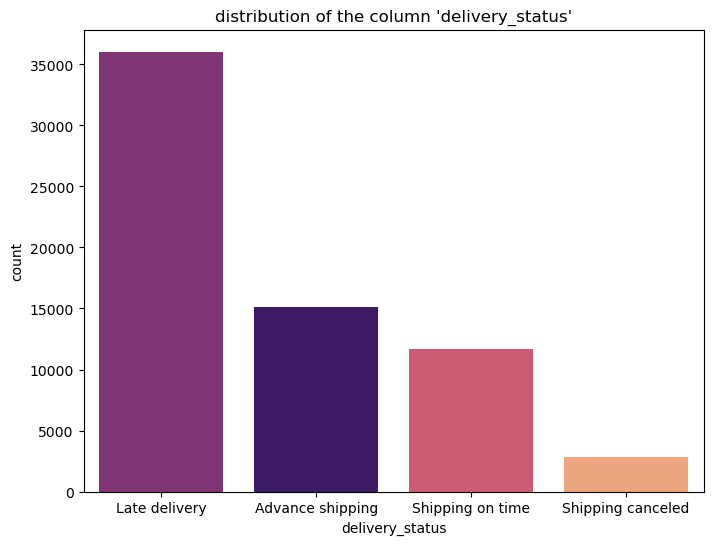

In [51]:
plt.figure(figsize=(8, 6))
plt.title("distribution of the column 'delivery_status'")
sns.countplot(data=sf, x="delivery_status", palette="magma", hue="delivery_status", order=frequency_table.index)                   # plot the count of all categories directly from dataset
plt.show()

### 6.1.4 - pie chart of distribution

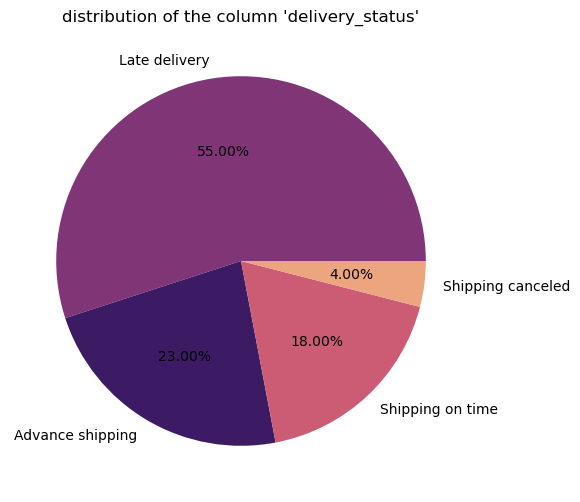

In [52]:
plt.figure(figsize=(8, 6))
plt.title("distribution of the column 'delivery_status'")
plt.pie(data=frequency_table_normalized, autopct='%1.2f%%', x="proportion", colors=['#803577', '#3C1B64', '#CB5C73', '#ECA57F'], labels=list(frequency_table_normalized.index))          # plot the count of top 5 categories as pie chart
plt.show()

## 6.2 - column "discount_ratio" 
**Conclusion:**
- numerical/continuos value (0.0 - 1.0)
- calculated by taking the sum of sf["Order Item Discount"] and sf["Sales"] for each group/order ("order_id"), then diving them
- looks like a normal distribution but not completely symmetrical, if we calculate the skewness -> the result (0.32) says that it is right skewed 
- we don't have any outliers
- it looks like it is platykurtic (distribution is not narrow but wide), if we calculate the kurtosis -> the result (-0,3) says the same

### 6.2.1 - find the number of unique values

In [53]:
sf.discount_ratio.nunique()

44653

### 6.2.2 - histplot of distribution

<Axes: title={'center': "distribution of the column 'discount_ratio'"}, xlabel='discount_ratio', ylabel='Count'>

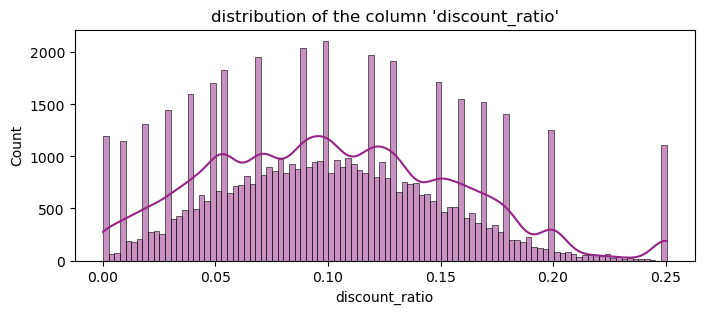

In [54]:
# choosing the bins parameter wisely is very useful
plt.figure(figsize=(8, 3))
plt.title("distribution of the column 'discount_ratio'")
sns.histplot(x = sf["discount_ratio"], color="#942587", bins=100, kde=True)   

### 6.2.3 - boxplot of distribution

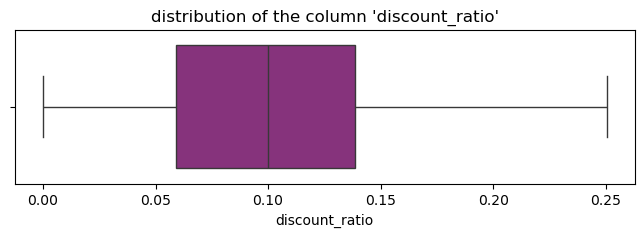

In [58]:
plt.figure(figsize=(8, 2))
plt.title("distribution of the column 'discount_ratio'")
sns.boxplot(x="discount_ratio", data = pd.DataFrame(sf["discount_ratio"]), color="#942587")                            
plt.show()

### 6.2.4 - Calculating skewness

In [59]:
print(round(float(sf["discount_ratio"].skew()), 2))      

0.32


### 6.2.5 - Calculating kurtosis

In [60]:
print(round(float(sf["discount_ratio"].kurtosis()), 2))

-0.3


# 7. - Bivariate Analysis

## 7.1 - columns: "delivery_status" vs "market" 
**Conclusion:**
- the delivery status "Late delivery" is the most common, no matter which continent (> 54%)
- after checking the crosstab, it doesn't seem like there is an association between, if we do the chi square test -> the result (0.49) says the same
- we can proof that with the strength of association by checking it with cramer's v -> the result (0.0076) says it is negligible


### 7.1.1 - Creating crosstab

In [61]:
crosstab_ds_market = pd.crosstab(sf.market, sf.delivery_status) 
display(crosstab_ds_market)
crosstab_ds_market_normalized = pd.crosstab(sf.market, sf.delivery_status, normalize="index") 
display(crosstab_ds_market_normalized)

delivery_status,Advance shipping,Late delivery,Shipping canceled,Shipping on time
market,,,,
Africa,890,2086,165,713
Europe,4314,10199,798,3250
LATAM,3990,9339,767,3085
Pacific Asia,4007,9720,724,3126
USCA,1926,4704,401,1548


delivery_status,Advance shipping,Late delivery,Shipping canceled,Shipping on time
market,,,,
Africa,0.230929,0.541256,0.042813,0.185003
Europe,0.232423,0.549485,0.042993,0.175098
LATAM,0.232233,0.543566,0.044642,0.179559
Pacific Asia,0.227968,0.552995,0.041190,0.177846
USCA,0.224502,0.548316,0.046742,0.180441


### 7.1.2 - chi square test (association of the two columns)

In [62]:
# finding the p-value of the chi square test
_, chi2_pvalue, _, _  = chi2_contingency(crosstab_ds_market)         

print(f"p-value: {chi2_pvalue}")    # 0.49 < 0.05 -> the p value is bigger than 0.05. We don't have a correlation between 
                                    # the two categorical variables "market" and "delivery_status"

p-value: 0.4921296651286381


### 7.1.3 - cramer's v test (strength of the association of the two columns)

In [63]:
association(crosstab_ds_market, method='cramer')    # 0.0076 is almost 0. That means that
                                                    # the strength of association is negligible

0.007613517836654274

### 7.1.4 - stacked bar charts

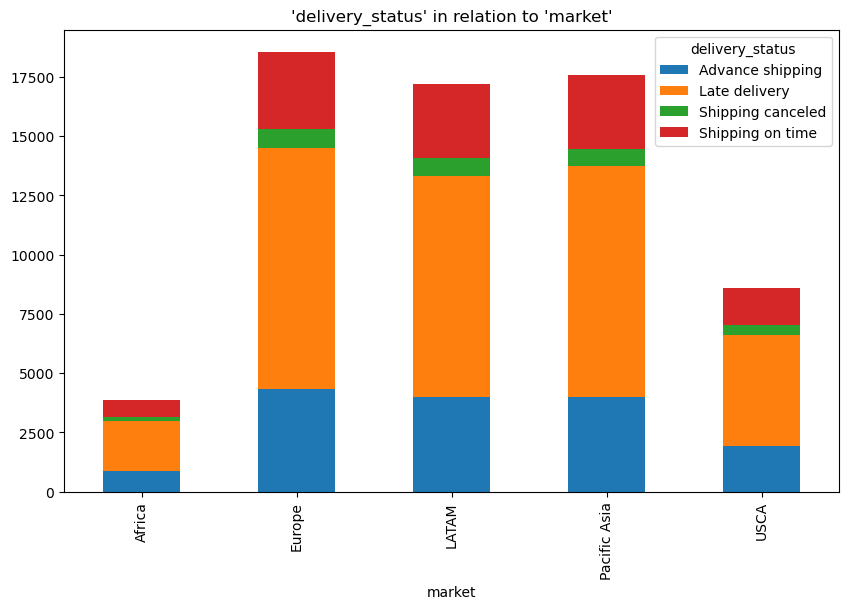

In [64]:
crosstab_ds_market.plot(kind='bar', stacked=True, title= "'delivery_status' in relation to 'market'", figsize=(10,6))
plt.show()

### 7.1.5 - countplot

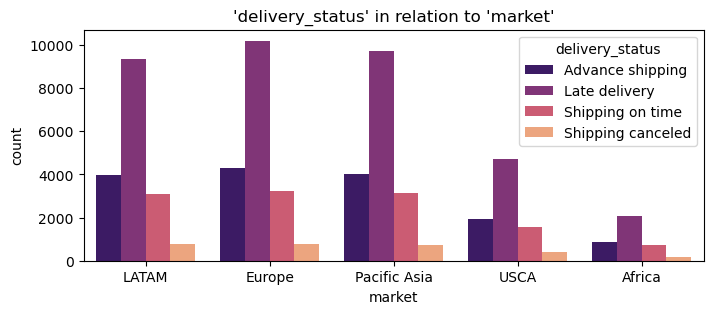

In [65]:
plt.figure(figsize=(8, 3))
plt.title("'delivery_status' in relation to 'market'")
sns.countplot(data=sf, x="market", palette="magma", hue="delivery_status")                   # plot the count of all categories directly from dataset
plt.show()